In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [2]:
path = "../../Risultati/Air_Quality/rf_regression_shuffle_false.csv"
df = pd.read_csv(path)
df.head()
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']


In [3]:
print(df)

     percentage  outlier     imputation        r2
0           100     none           none  0.699644
1            90     none           none  0.679104
2            80     none           none  0.658863
3            70     none           none  0.642931
4            60     none           none  0.634199
..          ...      ...            ...       ...
145          50  iforest  interpolation  0.418151
146          50      hst           drop  0.690428
147          50      hst           LOCF  0.173139
148          50      hst           mean -0.262233
149          50      hst  interpolation  0.125379

[150 rows x 4 columns]


In [4]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,imputation,r2
16,90,iforest,mean,-0.496044
32,90,iforest,mean,-0.512546
48,80,iforest,mean,-0.494245
52,80,hst,mean,-0.012898
64,80,iforest,mean,-0.471764
80,70,iforest,mean,-0.503011
84,70,hst,mean,-0.140365
96,70,iforest,mean,-0.496293
100,70,hst,mean,-0.069992
112,60,iforest,mean,-0.462240


In [5]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [6]:
df

,percentage,outlier,imputation,r2
0,100,none,none,0.699644
1,90,none,none,0.679104
2,80,none,none,0.658863
3,70,none,none,0.642931
4,60,none,none,0.634199
...,...,...,...,...
145,50,iforest,interpolation,0.418151
146,50,hst,drop,0.690428
147,50,hst,LOCF,0.173139
148,50,hst,mean,0.000000


In [7]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                       percentage        r2
outlier imputation                         
iforest drop            72.222222  0.753466
lof     drop            72.222222  0.724293
hst     drop            72.222222  0.710915
z       drop            72.222222  0.668000
none    none            75.000000  0.655054
lof     LOCF            72.222222  0.652351
z       LOCF            72.222222  0.646446
        interpolation   72.222222  0.645801
lof     interpolation   72.222222  0.635902
z       mean            72.222222  0.595649
hst     LOCF            72.222222  0.353775
        interpolation   72.222222  0.327979
iforest interpolation   72.222222  0.290854
        LOCF            72.222222  0.285991
lof     mean            72.222222  0.285145
hst     mean            72.222222  0.020834
iforest mean            72.222222  0.000000


In [8]:
df_none = df[(df['outlier'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_none

,percentage,r2
0,50,0.615580
1,60,0.634199
2,70,0.642931
3,80,0.658863
4,90,0.679104
5,100,0.699644


In [9]:
df_lof_LOCF = df[(df['outlier'] == 'lof') & (df['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof_LOCF

,percentage,r2
0,50,0.616620
1,60,0.634952
2,70,0.650550
3,80,0.665812
4,90,0.675956


In [10]:
df_lof_drop = df[(df['outlier'] == 'lof') & (df['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof_drop

,percentage,r2
0,50,0.710527
1,60,0.731735
2,70,0.724563
3,80,0.726921
4,90,0.720836


In [11]:
df_lof_int = df[(df['outlier'] == 'lof') & (df['imputation']=='interpolation')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_lof_int

,percentage,r2
0,50,0.583667
1,60,0.615020
2,70,0.634501
3,80,0.651902
4,90,0.668301


In [12]:
df_if_drop = df[(df['outlier'] == 'iforest') & (df['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_if_drop

,percentage,r2
0,50,0.722320
1,60,0.747943
2,70,0.757561
3,80,0.777009
4,90,0.746923


In [13]:
df_hst_locf = df[(df['outlier'] == 'hst') & (df['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_hst_locf

,percentage,r2
0,50,0.173139
1,60,0.282266
2,70,0.331872
3,80,0.413939
4,90,0.477342


In [14]:
df_if_locf_all = df[(df['outlier'] == 'iforest') & (df['imputation']=='LOCF')]
df_if_locf_all

,percentage,outlier,imputation,r2
15,90,iforest,LOCF,0.073345
31,90,iforest,LOCF,0.151029
47,80,iforest,LOCF,0.253293
63,80,iforest,LOCF,0.204370
79,70,iforest,LOCF,0.333678
95,70,iforest,LOCF,0.302964
111,60,iforest,LOCF,0.374744
127,60,iforest,LOCF,0.410715
143,50,iforest,LOCF,0.469778


In [15]:
df_z_locf = df[(df['outlier'] == 'z') & (df['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_z_locf

,percentage,r2
0,50,0.607764
1,60,0.629733
2,70,0.642050
3,80,0.658604
4,90,0.674738


[]

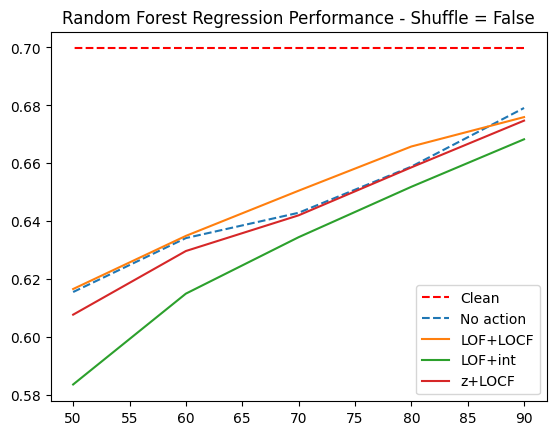

In [31]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_lof_LOCF['percentage'],df_lof_LOCF['r2'], label='LOF+LOCF')
plt.plot(df_lof_int['percentage'],df_lof_int['r2'], label='LOF+int')
#plt.plot(df_hst_locf['percentage'],df_hst_locf['r2'], label='HST+LOCF')
plt.plot(df_z_locf['percentage'],df_z_locf['r2'], label='z+LOCF')
#plt.plot(df_if_drop['percentage'],df_if_drop['r2'], label='IF+drop')
plt.title("Random Forest Regression Performance - Shuffle = False")
plt.legend()
plt.plot()

In [17]:
#Completeness + regression
#outlier + regression con nan_to_num
#inject none e outliers e provare prima uno e poi l'altro
#rifare tutto con un altro dataset

In [18]:
path = "../../Risultati/Occupancy_Detection/rf_classification_mix_outliers_none_shuffle_false.csv"
df_c = pd.read_csv(path)
df_c.head()
df_c.reset_index(drop=True)
df_c['percentage'] = 100 - df_c['percentage']

In [19]:
df_c

,percentage,outlier,imputation,r2
0,100,none,none,0.834612
1,90,none,none,0.827847
2,90,z,drop,0.884511
3,90,z,LOCF,0.831078
4,90,z,mean,0.817347
...,...,...,...,...
166,50,iforest,interpolation,0.810279
167,50,hst,drop,0.836459
168,50,hst,LOCF,0.827141
169,50,hst,mean,0.822395


In [20]:
df_c_grouped = df_c.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_c_grouped)

                       percentage        r2
outlier imputation                         
iforest drop            70.000000  0.904611
z       drop            70.000000  0.841639
hst     LOCF            70.000000  0.834269
        interpolation   70.000000  0.834259
z       interpolation   70.000000  0.833976
lof     LOCF            70.000000  0.832724
hst     drop            70.000000  0.831936
z       LOCF            70.000000  0.831533
lof     interpolation   70.000000  0.830957
none    none            72.727273  0.827930
hst     mean            70.000000  0.826716
z       mean            70.000000  0.812894
lof     mean            70.000000  0.800838
iforest LOCF            70.000000  0.798940
        interpolation   70.000000  0.798839
lof     drop            70.000000  0.783916
iforest mean            70.000000  0.771688


In [21]:
df_c_none = df_c[(df_c['imputation'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_none

,percentage,r2
0,50,0.828352
1,60,0.828403
2,70,0.822395
3,80,0.827544
4,90,0.829614
5,100,0.834612


In [22]:
df_c_z_drop = df_c[(df_c['outlier'] == 'z') & (df_c['imputation']=='drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_z_drop

,percentage,r2
0,50,0.801940
1,60,0.831638
2,70,0.843895
3,80,0.859014
4,90,0.871709


In [23]:
df_c_lof_locf = df_c[(df_c['outlier'] == 'lof') & (df_c['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_lof_locf

,percentage,r2
0,50,0.828453
1,60,0.834612
2,70,0.835773
3,80,0.831533
4,90,0.833249


In [24]:
df_c_z_locf = df_c[(df_c['outlier'] == 'z') & (df_c['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_z_locf

,percentage,r2
0,50,0.832391
1,60,0.829968
2,70,0.822900
3,80,0.836329
4,90,0.836076


In [25]:
df_c_if_locf = df_c[(df_c['outlier'] == 'iforest') & (df_c['imputation']=='LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_c_if_locf

,percentage,r2
0,50,0.823657
1,60,0.805432
2,70,0.795386
3,80,0.785036
4,90,0.785188


[]

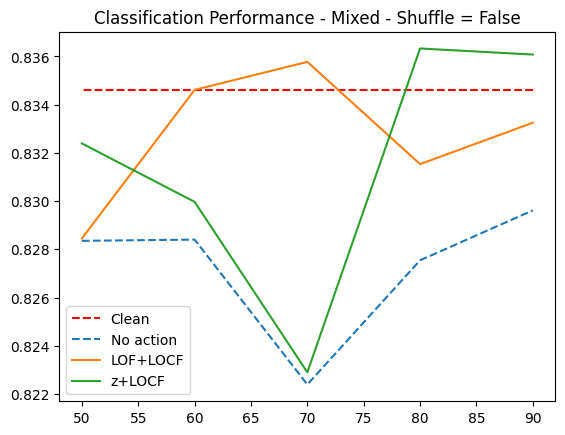

In [28]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_c_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_c_none['percentage'].iloc[:-1],df_c_none['r2'].iloc[:-1], '--', label='No action')
plt.plot(df_c_lof_locf['percentage'],df_c_lof_locf['r2'], label='LOF+LOCF')
plt.plot(df_c_z_locf['percentage'],df_c_z_locf['r2'], label='z+LOCF')
#plt.plot(df_c_if_locf['percentage'],df_c_if_locf['r2'], label='IF+ LOCF')
#plt.plot(df_c_z_drop['percentage'],df_c_z_drop['r2'], label='z+drop')
plt.title("Classification Performance - Mixed - Shuffle = False")
plt.legend()
plt.plot()